### Reading the dataset

In [1]:
import pandas as pd
data = pd.read_csv('emails.csv')
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [2]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

### EDA and Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


#### Cleaning the text

In [4]:
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d', '', text)
    
    # Remove 'subject' if it is the first word
    if text.startswith('subject'):
        text = text[len('subject'):].strip()
        
    # Tokenization and stemming
    words = word_tokenize(text)
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    
    return ' '.join(words)
           

data['text'] = data['text'].apply(lambda x: clean_text(x))
data['length'] = data['text'].apply(lambda x:len(str(x)))
data['words'] = data['text'].apply(lambda x:len(str(x).split()))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anany\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\anany\AppData\Local\Temp\ipykernel_27952\3093986477.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


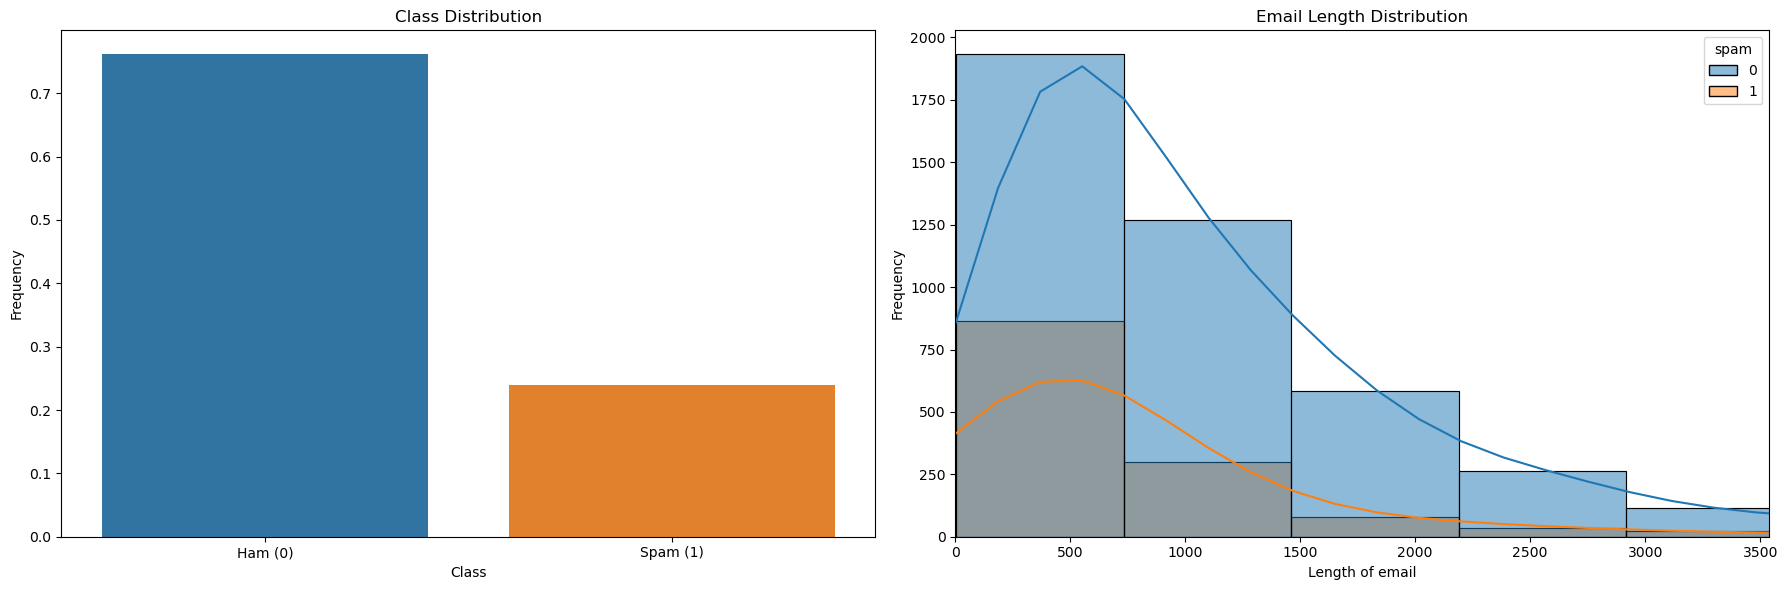

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


class_distribution = data['spam'].value_counts(normalize=True)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=class_distribution.index, y=class_distribution.values, ax=ax[0])
ax[0].set_title('Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(['Ham (0)', 'Spam (1)'])

sns.histplot(data, x='length', hue='spam', bins=50, ax=ax[1], kde=True)
ax[1].set_title('Email Length Distribution')
ax[1].set_xlabel('Length of email')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim(0, data['length'].quantile(0.95))  # Limit to 95th percentile for better visualization

plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

X = data[['text', 'length', 'words']]
y = data['spam']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

train = pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv('train.csv', index=False)
validation.to_csv('validation.csv', index=False)
test.to_csv('test.csv', index=False)